In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('superstore_sales.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [4]:
#which collums have null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [22]:
df.set_index('Order ID').head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order ID,,,,,,,,,,,,,,,,,
CA-2017-152156,1,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
CA-2017-152156,2,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
CA-2017-138688,3,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
US-2016-108966,4,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
US-2016-108966,5,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
#Question 2 - Groupby according to ‘Segment’ & ‘Category’. 
#Display which Segment has the highest sales.
df_segment = df[["Segment", "Sales", "Category"]]
df_segment.groupby(["Segment", "Category"]).sum().round(2)

Sales
Segment     Category                  
Consumer    Furniture        387696.26
            Office Supplies  359352.61
            Technology       401011.66
Corporate   Furniture        220321.70
            Office Supplies  224130.54
            Technology       244041.84
Home Office Furniture        120640.62
            Office Supplies  121939.19
            Technology       182402.37

<AxesSubplot:xlabel='Segment'>

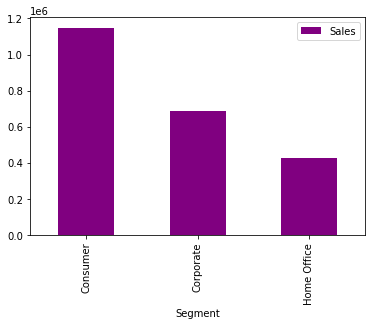

In [10]:
#Question 3 - Plot the Segments by sales using a bar chart.
df_segment.groupby(["Segment"]).sum().plot(kind='bar', color='purple')

In [25]:
#Question 4 - Sum the ‘Revenue’ generated by each ‘category’, 
#which category generated the highest revenue?   
#Plot the revenue by category
df_region = df[["Category", "Sales"]]
df_region.groupby(['Region']).sum().sort_values( by ='Sales', ascending=False)

KeyError: 'Region'

In [32]:
#Question 5 List the ‘Regions’ by highest sales first.
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%y', errors = 'ignore')
df['Order Date'].head(3)

0    08/11/2017
1    08/11/2017
2    12/06/2017
Name: Order Date, dtype: object

In [ ]:
#Question 5 Convert the date column into datetime type


In [27]:
#Question 6 Find out what was sold and where in 2018?
df_2018sold = df_2018[["Product Name", "City"]]
df_2018sold

NameError: name 'df_2018' is not defined

In [31]:
#Question 7 Find ‘Vermont’ Sales only related to 
#‘furniture’ & Units sales greater than 1,000. 
#Using matplotlib (kind=bar)

df_vermont = df.loc[(df['State'] == 'Vermont') & (df['Category'] == 'Furniture') & (df['Sales'] > 1000),
                   ['State', 'Category', 'Sales']]
df_vermont


,State,Category,Sales
9741,Vermont,Furniture,4404.9
